<h1 style="text-align:center">Regression Analysis for the California Housing census</h1>

<p style="text-align:center">Author: Jose Pena</p>
<p style="text-align:center">Github: <a href="https://github.com/JoseJuan98">JoseJuan98</a></p>
<br>

------------------------------------------------------------------------------------------------

<br>

## Aims

The aim of this notebook is to demonstrate the data regression skills leveraging a wide variety of tools, but also this report focuses on present findings, insights, and next steps.

-----------------------------------

## Instructions:

This exercise will demonstrate the data regression skills. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review.

The development will center around 5 main points:

1.  Does the report include a section describing the data?
2.  Does the report include a paragraph detailing the main objective(s) of this analysis?
3.  Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4.  Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5.  Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*   A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*   Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*   Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


-------------------------------------------

# Setup

For this Regression Data Analysis project the following libraries will be used:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2021-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2021-01-01) for visualizing the data.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2021-01-01) for machine learning related functions.

## Imports

In [1]:
import pandas
import numpy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

from scipy.stats import normaltest
from scipy.special import inv_boxcox

from src.utils.data_transformations import preprocess_data

from sklearn.metrics import mean_squared_error, mean_absolute_error

# utils.py
from src.utils import fetch_housing_data, HOUSING_URL, HOUSING_PATH, TARGET

Setting up some options:

In [2]:
# Display and store plot within the notebook
%matplotlib inline

# Show all columns when displaying dataframe
pandas.options.display.max_columns = None

 Load data, if it wasn't downloaded before it will fetch it from the URL specified, otherwise will load it from a local '.csv' file.

In [3]:
data = fetch_housing_data(url=HOUSING_URL,
                          path=HOUSING_PATH)

# 1. About the Data

This California Housing dataset is available from [Luís Torgo's page](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html) (University of Porto).

This dataset appeared in a 1997 paper titled Sparse Spatial Autoregressions by Pace, R. Kelley and Ronald Barry, published in the Statistics and Probability Letters journal. They built it using the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

The target variable or dependent variable for this anlysis will be the `median_house_value`, which describes median price of the houses per block group.

**Shape of the dataset**

In [4]:
data.shape

(20640, 10)

**List of columns**

In [5]:
data.columns.to_list()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

**First 5 rows of the dataset**

In [6]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Non-null values count, type of feature and memory usage**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Statistical properties of the dataset**

In [8]:
data.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


As it was analyzed in the previous exercise of Exploratory Data Analysis ([notebook](ExploratoryDataAnalysis.ipynb), [report](/reports/ExploratoryDataAnalysis.pdf)) the actions taken for Data Cleaning and Feature Engineering are:
* Target normalization
* Handling missing values
* Handling outliers
* Encoding categorical variables
* Scaling continuous variables

And these actions are encapsulated in the method `prepare_data()` from the `utils/data_transformations.py`, but first
the data must be split to create the train and test set to avoid overfitting and inaccurate evaluation.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=[TARGET], axis=1), data[TARGET], random_state=42, test_size=0.3)

In [10]:
f" Shape x_train {x_train.shape} - y_train {y_train.shape}"

' Shape x_train (14448, 9) - y_train (14448,)'

In [11]:
f" Shape x_test {x_test.shape} - y_test {y_test.shape}"

' Shape x_test (6192, 9) - y_test (6192,)'

# 2. Objectives

This exercise focuses in the predictions of the models, so this approach compares $y_p$ with $y$ by **performance metrics**,
which measure the quality of the model's predictions (closeness between $y_p$ and $y$).

As this approach doesn't focus on interpretability there is a greater risk of having a Black-box model, so it's recommended
also to explore an approach based in interpretation to have both.

# TODO

- Summary of training at least three linear regression models which should be variations that cover using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
- A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
- Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
- Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.

# 3. Linear Regression Models


In [12]:
def rmse(y_true, y_pred):
    return numpy.sqrt(mean_squared_error(y_true, y_pred))

metrics = {}

def add_metrics(metrics_report: dict, model_name: str, y_true, y_pred, lmbda: float) -> dict:
    """

    Args:
        metrics_report:
        model_name:
        y_true:
        y_pred:

    Returns:
        dict: per model
                - MSE: penalizes big errors
                - RMSE: standarize unit errors
                - R2: proportion of variance (0,1) - The bigger better
                - MAE: average of erros
    """
    y_pred = inv_boxcox(y_pred, lmbda)
    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    rmse = numpy.sqrt(mse)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)

    metrics_report[model_name] = {
        'MSE': round(mse, 4),
        'RMSE': round(rmse, 4),
        'R2': round(r2, 4),
        'MAE': round(mae, 4)
    }
    return metrics_report

#### Preparing the data

As mentioned in the Exploratory Data Analysis indicates that there is collinearity between some variables.

In [13]:
# Compute correlation matrix
corr_matrix = x_train.corr(numeric_only=True)

print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.923408           -0.101083     0.037158   
latitude            -0.923408  1.000000            0.003461    -0.028768   
housing_median_age  -0.101083  0.003461            1.000000    -0.362713   
total_rooms          0.037158 -0.028768           -0.362713     1.000000   
total_bedrooms       0.061797 -0.059700           -0.321328     0.929527   
population           0.092163 -0.101665           -0.291589     0.855384   
households           0.047659 -0.063487           -0.302516     0.920133   
median_income       -0.019019 -0.075892           -0.117506     0.198362   

                    total_bedrooms  population  households  median_income  
longitude                 0.061797    0.092163    0.047659      -0.019019  
latitude                 -0.059700   -0.101665   -0.063487      -0.075892  
housing_median_age       -0.321328   -0.291589   -0.302516      -0.117506  
total_rooms

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numerical_X_train = x_train.select_dtypes(include='number')

# Compute VIF scores
vif_scores = pandas.Series([variance_inflation_factor(numerical_X_train.values, i) for i in range(numerical_X_train.shape[1])], index=numerical_X_train.columns)

# Print VIF scores
print(vif_scores)

longitude             614.104270
latitude              548.596876
housing_median_age      7.259158
total_rooms            30.774710
total_bedrooms         95.973312
population             15.813275
households             94.392021
median_income           8.260040
dtype: float64


In [15]:
corr_matrix[corr_matrix > 0.7]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
housing_median_age,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
total_rooms,NaN,NaN,NaN,1.000000,0.929527,0.855384,0.920133,NaN
total_bedrooms,NaN,NaN,NaN,0.929527,1.000000,0.876119,0.980570,NaN
population,NaN,NaN,NaN,0.855384,0.876119,1.000000,0.904678,NaN
households,NaN,NaN,NaN,0.920133,0.980570,0.904678,1.000000,NaN
median_income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


Based on the results from the VIF score and correlation matrix, it can be observed that `total_rooms` and `total_bedrooms` have high values of VIF, indicating that these two variables are highly correlated. This high correlation is not surprising, as `total_rooms` may affect the number of `total_bedrooms`. However, including both features in the model can lead to issues with multicollinearity, as it becomes difficult to distinguish the individual effect of each variable on the target variable. Therefore, it may be necessary to address multicollinearity in the model, either by removing one of the highly correlated features or by using techniques such as ridge regression or principal component analysis.

The same with `population` and `households`.

In [16]:
vars_to_remove = ['total_rooms', 'population', 'households']
x_train = x_train.drop(columns=vars_to_remove, axis=1)
x_test = x_test.drop(columns=vars_to_remove, axis=1)

In [17]:
# TODO
# import importlib
# import sys
# importlib.reload(sys.modules['src.utils.data_transformations'])
# from src.utils.data_transformations import preprocess_data

In [18]:
vars_with_outliers = ["median_income", "total_bedrooms",
                      "housing_median_age"]

x_train, y_train, preprocessor, lmbda = preprocess_data(X=x_train, y=y_train, variables_with_outliers=vars_with_outliers, normalize_target=True)
x_test, y_test, _, _ = preprocess_data(X=x_test, y=y_test, preprocessor=preprocessor, variables_with_outliers=vars_with_outliers,
                                       )#normalize_target=True, normalization_lmbda=lmbda)

In [19]:
preprocessor

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(missing_values=<NA>)),
                                                 ('scaler', MinMaxScaler())],
                                          verbose=True),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_bedrooms', 'median_income']),
                                ('categorical',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))],
                                          verbose=True),
                                 ['ocean_proximity'])],
                  verbose=True)

### Checking if the target is now normally distributed

The `normlatest` function is a statistical test for normality that combines skewness and kurtosis based on D'Agostino and Pearson's method.

It produces a p-value, which indicates the goodness of fit to a normal distribution. A higher p-value suggests a closer match to a normal distribution. Generally, frequentist statisticians consider a p-value greater than 0.05 as evidence that the distribution is normal, and fail to reject the null hypothesis of normality.

However, it's important to note that this test is not perfect and has some limitations.

In [20]:
normaltest(y_train)

NormaltestResult(statistic=array([332.66882662]), pvalue=array([5.77939196e-73]))

In [28]:
normaltest(y_test)

NormaltestResult(statistic=716.5809435890789, pvalue=2.4912951418262196e-156)

### Simple Linear Regression

In [22]:
lr = GridSearchCV(estimator=LinearRegression(n_jobs=-1),
                  n_jobs=-1,
                  verbose=1,
                  param_grid={},
                  cv=5)

In [23]:
lr.fit(X=x_train, y=y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
             param_grid={}, verbose=1)

In [24]:
metrics = add_metrics(metrics_report=metrics,
                      model_name='LR_Simple',
                      y_true=y_test,
                      y_pred=lr.predict(x_test),
                      lmbda=lmbda)

print(f"{metrics['LR_Simple']}")

{'MSE': 7081981136.8595, 'RMSE': 84154.5075, 'R2': 0.4604, 'MAE': 56842.5729}


### Linear Regression with Polynomial Features

In [25]:
model_polyn_pipe = Pipeline(steps=[
    ('polynomail', PolynomialFeatures(degree=3, include_bias=False)),
    ('lr', LinearRegression(n_jobs=-1))
])

lr_polynomial = GridSearchCV(
    estimator=model_polyn_pipe,
    n_jobs=-1,
    verbose=1,
    param_grid={},
    cv=5)

In [26]:
lr_polynomial.fit(X=x_train, y=y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomail',
                                        PolynomialFeatures(degree=3,
                                                           include_bias=False)),
                                       ('lr', LinearRegression(n_jobs=-1))]),
             n_jobs=-1, param_grid={}, verbose=1)

In [27]:
# metrics = add_metrics(metrics_report=metrics,
#                       model_name='LR_PolynEffects',
#                       y_true=y_test,
#                       y_pred=lr_polynomial.predict(x_test),
#                       lmbda=lmbda)
#
# print(f"{metrics['LR_PolynEffects']}")

ValueError: Input contains NaN.

### Regression with Regularization

In [34]:
l1_ratios = numpy.linspace(0.1, 0.9, 9)
alphas = numpy.array([1e-5, 5e-5, 0.0001, 0.0005])

lr_regularization = ElasticNetCV(
    alphas=alphas,
    l1_ratio=l1_ratios,
    n_jobs=-1,
    max_iter=int(1e5),
    cv=5
)

In [35]:
lr_regularization.fit(X=x_train, y=y_train)

/home/goldenfox/Work/Projects/ML_Projects/CaliforniaHousingCensusCase/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ElasticNetCV(alphas=array([1.e-05, 5.e-05, 1.e-04, 5.e-04]), cv=5,
             l1_ratio=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
             max_iter=100000, n_jobs=-1)

In [36]:
metrics = add_metrics(metrics_report=metrics,
                      model_name='Regularization',
                      y_true=y_test,
                      y_pred=lr_regularization.predict(x_test),
                      lmbda=lmbda)

print(f"{metrics['Regularization']}")

{'MSE': 7082546606.4085, 'RMSE': 84157.8672, 'R2': 0.4604, 'MAE': 56845.0172}


Processing data:

```json
{
    "LR_Simple": {
        "MSE": 6784237334.8747,
        "RMSE": 82366.4819,
        "R2": 0.4831,
        "MAE": 59813.3505
    },
    "LR_PolynEffects": {
        "MSE": 5496039866.1283,
        "RMSE": 74135.2808,
        "R2": 0.5813,
        "MAE": 52709.0184
    },
    "Regularization": {
        "MSE": 6784518279.5301,
        "RMSE": 82368.1873,
        "R2": 0.4831,
        "MAE": 59803.6537
    }
}

# without splitting first


    "LR_Simple": {
        "MSE": 6759249893.0372,
        "RMSE": 82214.6574,
        "R2": 0.485,
        "MAE": 59836.6745
    },
    "LR_PolynEffects": {
        "MSE": 7.773524881389625e+23,
        "RMSE": 881675954157.1736,
        "R2": -59225046420386.34,
        "MAE": 11204573367.0155
    },
    "Regularization": {
        "MSE": 6759466449.1363,
        "RMSE": 82215.9744,
        "R2": 0.485,
        "MAE": 59830.8617
    }
}
```

In [37]:
import json
print(json.dumps(metrics, indent=4))

{
    "LR_Simple": {
        "MSE": 7081981136.8595,
        "RMSE": 84154.5075,
        "R2": 0.4604,
        "MAE": 56842.5729
    },
    "Regularization": {
        "MSE": 7082546606.4085,
        "RMSE": 84157.8672,
        "R2": 0.4604,
        "MAE": 56845.0172
    }
}


In [38]:
y_test.mean(), y_test.median(), y_test.min(), y_test.max()

(206696.8142764858, 181000.0, 14999.0, 500001.0)

# 4. Insights and key findings


In [39]:
from matplotlib import pyplot

In [40]:
# Inverse the normalization to get easier interpretations of the results
y_pred = inv_boxcox(lr_regularization.predict(x_test), lmbda)

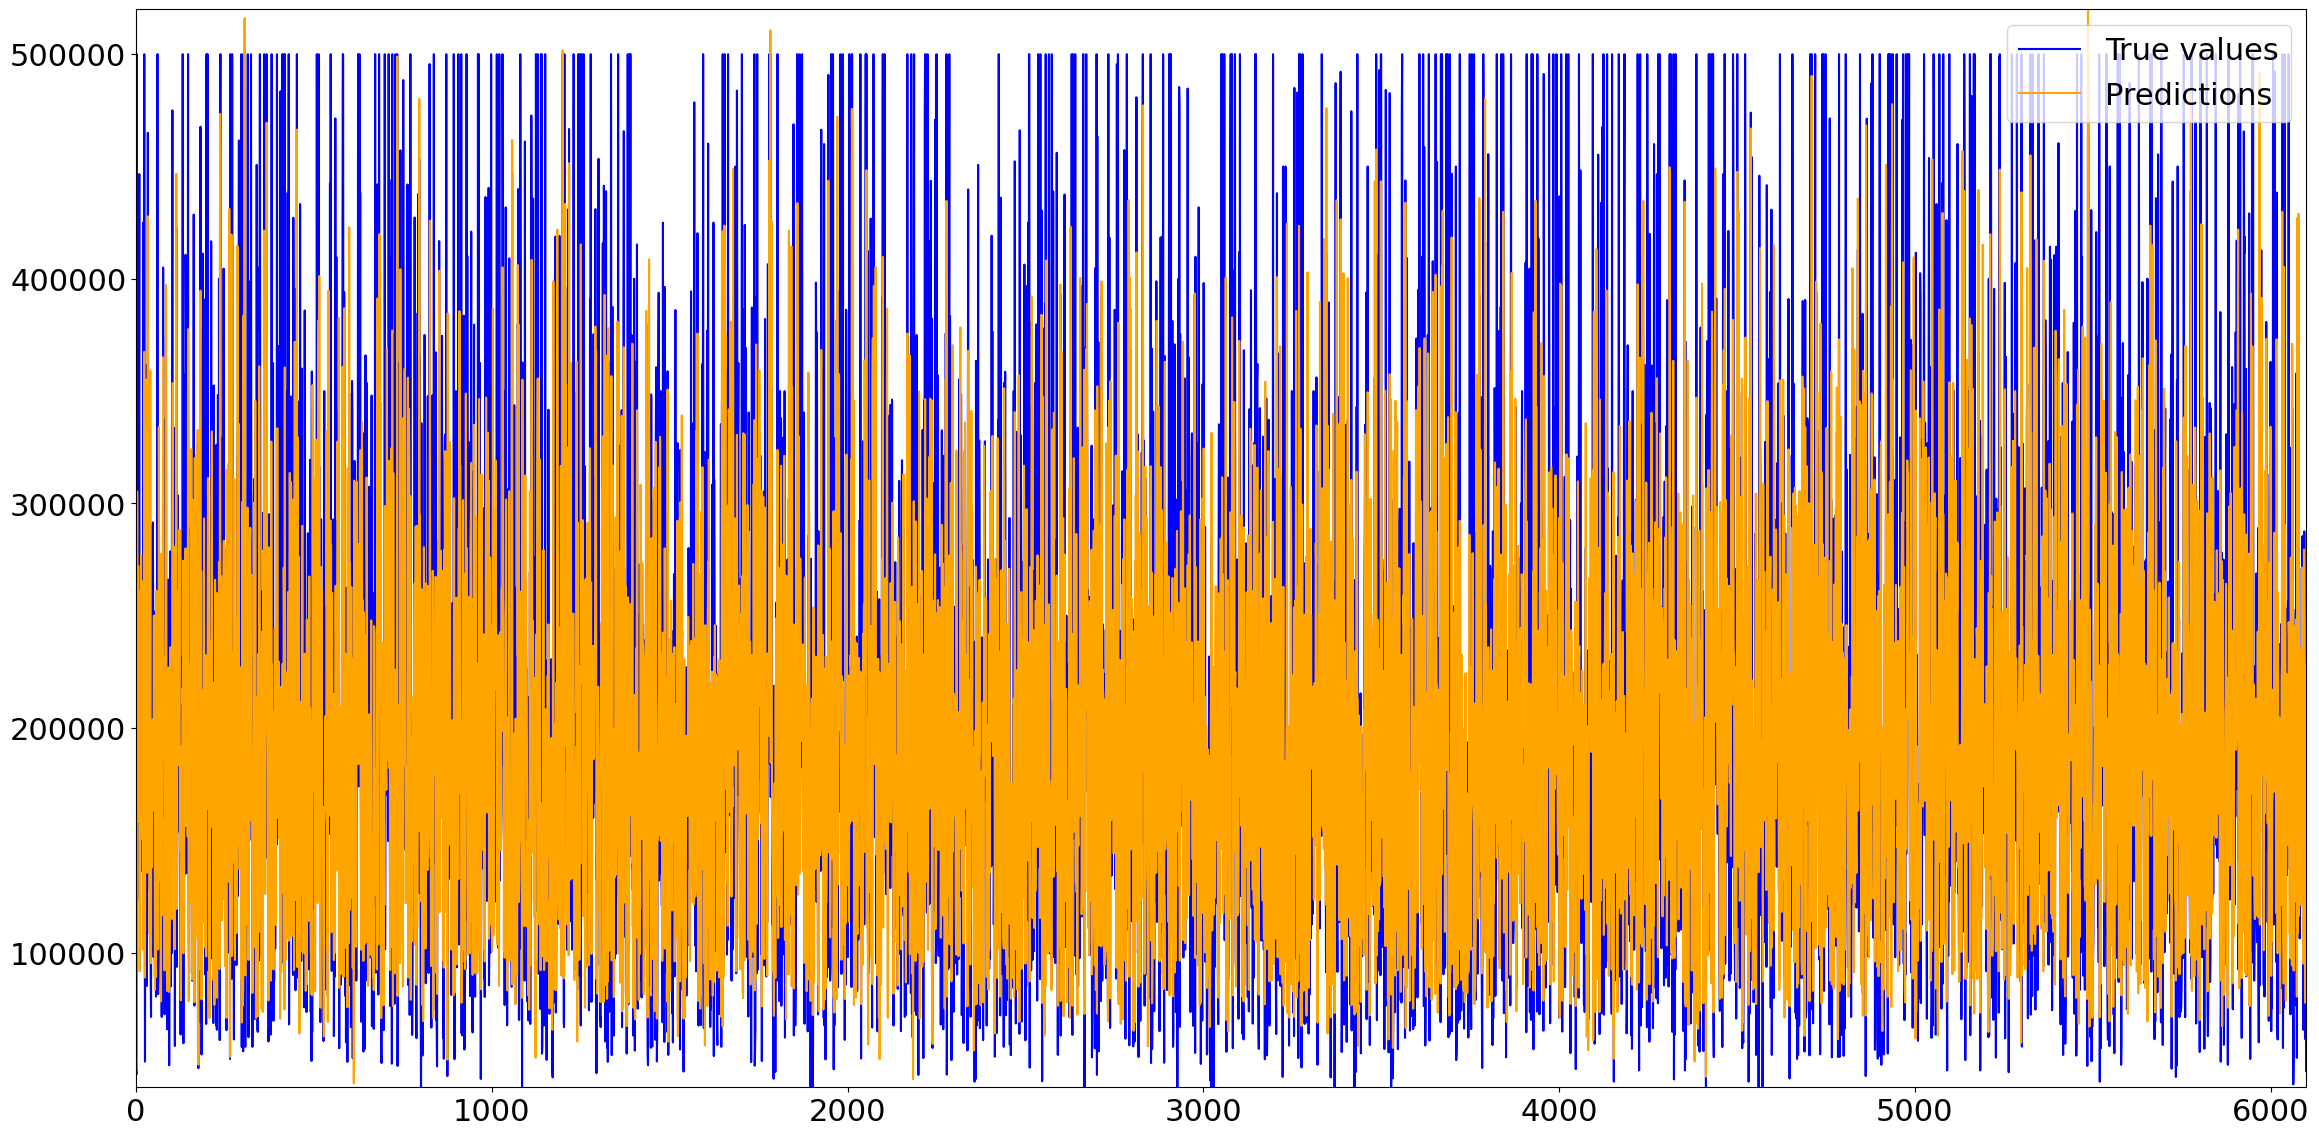

In [60]:
pyplot.figure(figsize=(28,14))
pyplot.plot(range(len(y_test)), y_test, color='blue', label='True values')
pyplot.plot(range(len(y_pred)), y_pred, color='orange', label='Predictions')
pyplot.xticks(fontsize=22)
pyplot.yticks(fontsize=22)
pyplot.legend(fontsize=22)
pyplot.ylim(40000, 520000)
pyplot.xlim(0, 6100)
pyplot.show();

# 5. Next Steps


## Author

<p>Author: Jose Pena</p>
<p>Github: <a href="https://github.com/JoseJuan98">JoseJuan98</a></p>

## Change Log
| Date (YYYY-MM-DD) | Version | Changed By | Change Description   |
|-------------------| ------- | ---------- | -------------------- |
| 2022-11-27        | 1.0     | Jose       | First version        |
